## Bell Pepper Leaves Disease Detection

In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/archive (1)/Pepper Belly Crop DS")

Found 2359 files belonging to 2 classes.


In [5]:
len(data)

74

In [6]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0]


In [7]:
class_names = data.class_names
class_names

['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

## Data Visualization

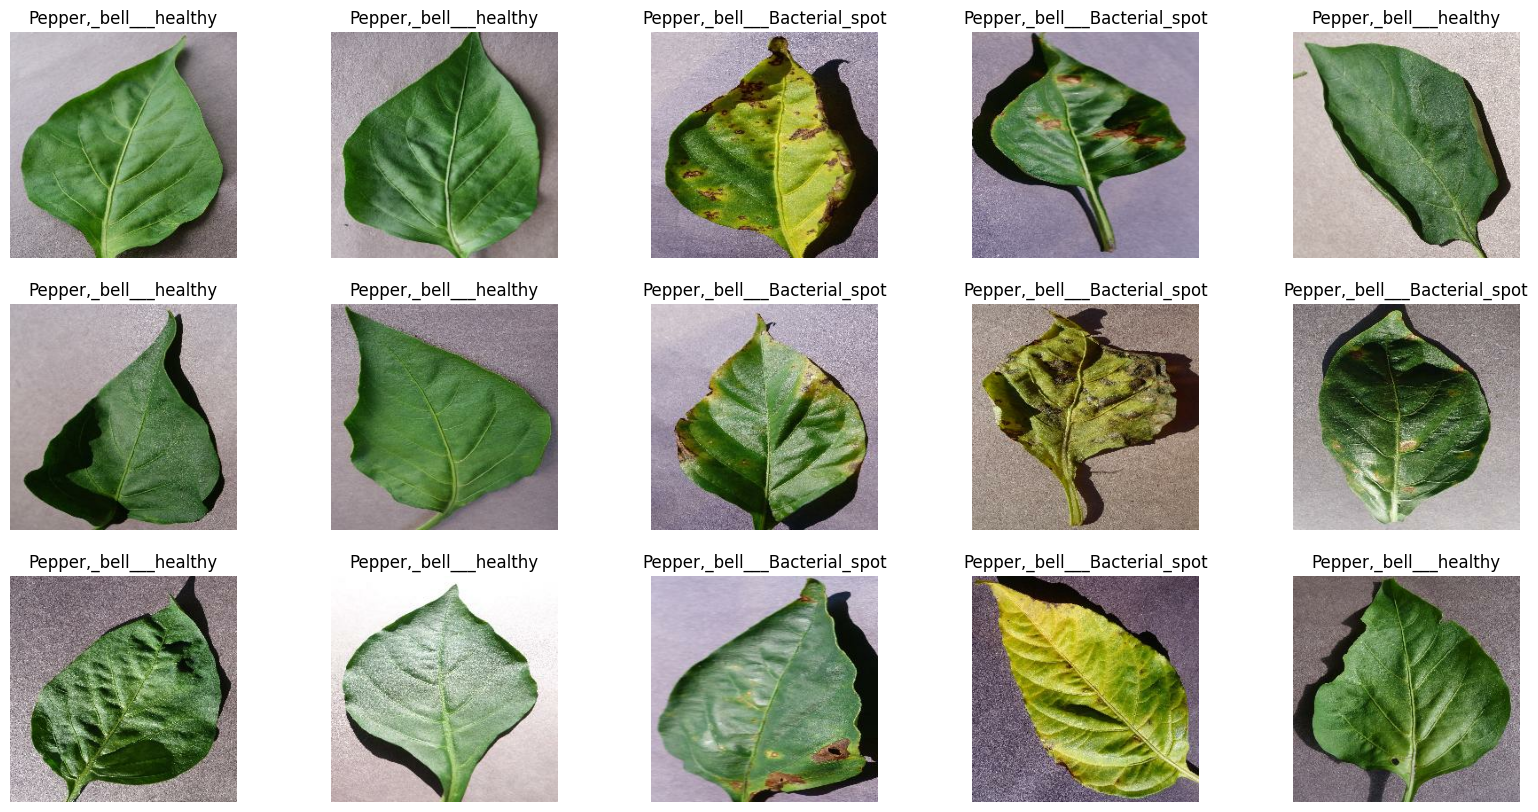

In [8]:
plt.figure(figsize=(20,10))
for image_batch, label_batch in data.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## Splitting the data

In [9]:
def data_split(data, train_split=0.8, val_split=0.1, test_data=0.1, shuffle=True, shuffle_size=1000):
    data_size = len(data)

    if shuffle:
        data = data.shuffle(shuffle_size, seed=10)

    train_size = int(train_split * data_size)
    val_size = int(val_split * data_size)

    train_data = data.take(train_size)
    val_data = data.skip(train_size).take(val_size)
    test_data = data.skip(train_size).skip(val_size)

    return train_data, val_data, test_data

In [10]:
train_data, val_data, test_data = data_split(data)

In [11]:
print(f"Actual Data: {len(data)}")
print(f"Train data: {len(train_data)} + Validation_data: {len(val_data)} + Test data: {len(test_data)} = {len(train_data) + len(val_data) + len(test_data)}")

Actual Data: 74
Train data: 59 + Validation_data: 7 + Test data: 8 = 74


In [12]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0/255)
])

##Model building

In [13]:
model= Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 84, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 82, 82, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,850 (1.54 MB)

 Trainable params: 402,850 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_history=model.fit(train_data, epochs=10, batch_size=32, validation_data=val_data,verbose=2)

Epoch 1/10
59/59 - 261s - 4s/step - accuracy: 0.7318 - loss: 1.3273 - val_accuracy: 0.9241 - val_loss: 0.1942
Epoch 2/10
59/59 - 26s - 434ms/step - accuracy: 0.9037 - loss: 0.2593 - val_accuracy: 0.9330 - val_loss: 0.3989
Epoch 3/10
59/59 - 24s - 408ms/step - accuracy: 0.9553 - loss: 0.1392 - val_accuracy: 0.9911 - val_loss: 0.0535
Epoch 4/10
59/59 - 22s - 378ms/step - accuracy: 0.9766 - loss: 0.0820 - val_accuracy: 0.9643 - val_loss: 0.0705
Epoch 5/10
59/59 - 23s - 390ms/step - accuracy: 0.9803 - loss: 0.1058 - val_accuracy: 0.9955 - val_loss: 0.0162
Epoch 6/10
59/59 - 44s - 746ms/step - accuracy: 0.9787 - loss: 0.0756 - val_accuracy: 0.9767 - val_loss: 0.0795
Epoch 7/10
59/59 - 37s - 622ms/step - accuracy: 0.9851 - loss: 0.0505 - val_accuracy: 0.9866 - val_loss: 0.0245
Epoch 8/10
59/59 - 23s - 384ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9866 - val_loss: 0.0393
Epoch 9/10
59/59 - 23s - 395ms/step - accuracy: 0.9766 - loss: 0.0760 - val_accuracy: 0.9911 - val_loss: 0

In [16]:
accuracy,loss = model.evaluate(test_data)
print(f"Accuracy:{accuracy}")
print(f"loss:{loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9890 - loss: 0.0429
Accuracy:0.042405884712934494
loss:0.98828125


## Visualzation of Accuracy & loss

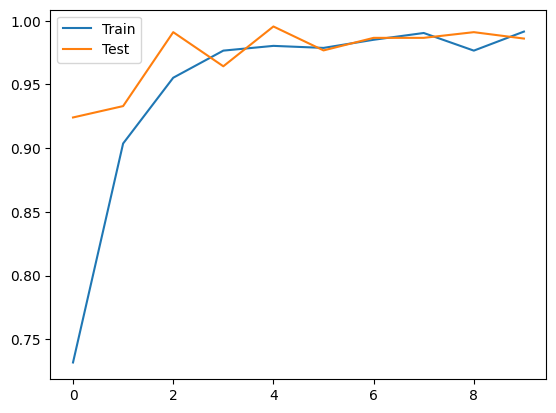

In [17]:
plt.plot(range(10), model_history.history['accuracy'], label='Train')
plt.plot(range(10), model_history.history['val_accuracy'], label='Test')
plt.legend()

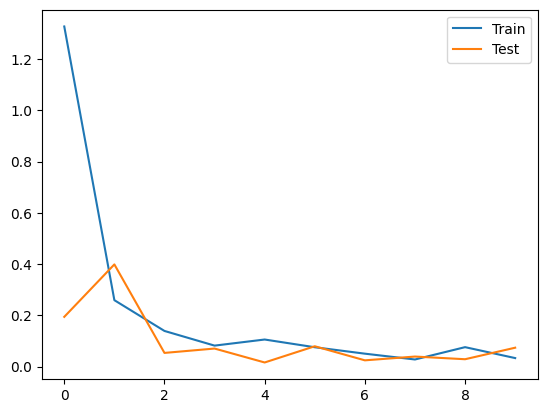

In [18]:

plt.plot(range(10),model_history.history['loss'],label='Train')
plt.plot(range(10),model_history.history['val_loss'],label='Test')
plt.legend()


## Actual data and Predicted data




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


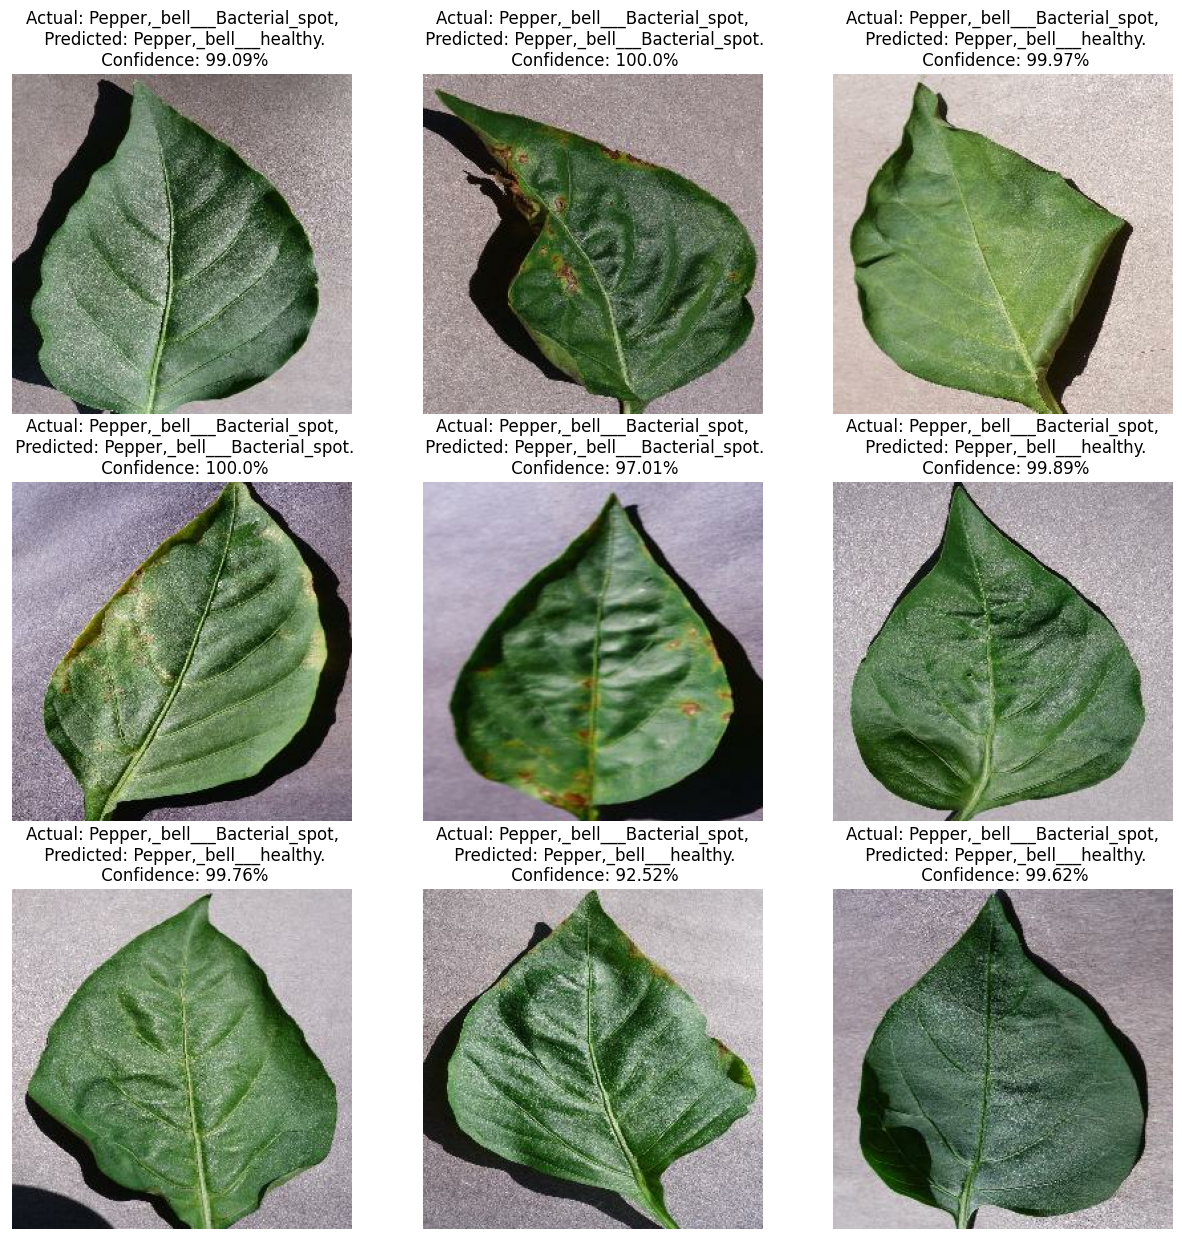

In [22]:
import numpy as np

def predict(model, image):

  image = image.reshape(1, 256, 256, 3)  # Reshape to match model input shape
  prediction = model.predict(image)
  predicted_class_index = np.argmax(prediction)
  predicted_class = class_names[predicted_class_index]
  confidence = round(100 * (np.max(prediction)), 2)  # Get confidence score
  return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy()) # Call the newly defined predict function
        actual_class = class_names[np.argmax(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Actual label: Pepper,_bell___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted label: Pepper,_bell___Bacterial_spot


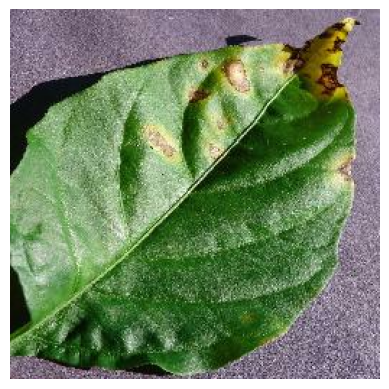

In [23]:
for images_batch, labels_batch in test_data.take(1):

    actual_image = images_batch[0].numpy().astype("uint8")
    actual_label = labels_batch[0].numpy()

    plt.imshow(actual_image)
    plt.axis("off")
    actual_class_index = np.argmax(actual_label)
    print(f"Actual label: {class_names[actual_class_index]}")

    predtiction = model.predict(images_batch)
    print(f"Predicted label: {class_names[np.argmax(predtiction[0])]}")
#     print(predtiction[0])

In [24]:
model.save_weights('pepperleaf_weight.weights.h5')


In [25]:
model.save('pepperleaf.keras')